In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,NaN,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,NaN,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	36
float64		column 3	22
float64		column 4	34
float64		column 5	41
float64		column 6	42
float64		column 7	37
float64		column 8	28
float64		column 9	33


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,649.000000,647.000000,661.000000,649.000000,642.000000,641.000000,646.000000,655.000000,650.000000
mean,4.448382,3.148377,3.183056,2.853621,3.232087,3.530421,3.467492,2.888550,1.610769
std,2.811605,3.059208,2.955952,2.865583,2.211309,3.639981,2.445314,3.063264,1.738056
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

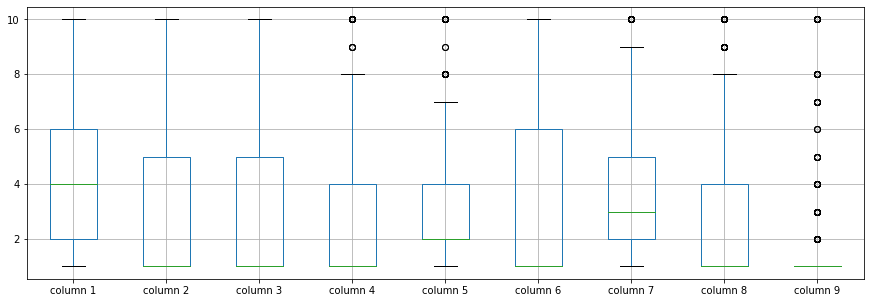

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.448382
column 2    3.148377
column 3    3.183056
column 4    2.853621
column 5    3.232087
column 6    3.530421
column 7    3.467492
column 8    2.888550
column 9    1.610769
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.631974,0.637710,0.494835,0.512322,0.589945,0.553278,0.525092,0.343985
column 2,0.631974,1.000000,0.901590,0.710184,0.750693,0.689454,0.765317,0.713119,0.499674
column 3,0.637710,0.901590,1.000000,0.681546,0.714057,0.709596,0.742381,0.703060,0.443864
column 4,0.494835,0.710184,0.681546,1.000000,0.595848,0.665755,0.670282,0.595306,0.443905
column 5,0.512322,0.750693,0.714057,0.595848,1.000000,0.573325,0.620145,0.630509,0.499245
column 6,0.589945,0.689454,0.709596,0.665755,0.573325,1.000000,0.673724,0.584301,0.347308
column 7,0.553278,0.765317,0.742381,0.670282,0.620145,0.673724,1.000000,0.672774,0.379336
column 8,0.525092,0.713119,0.703060,0.595306,0.630509,0.584301,0.672774,1.000000,0.452421
column 9,0.343985,0.499674,0.443864,0.443905,0.499245,0.347308,0.379336,0.452421,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+29,9+29+29,9+29+29,9+29+29+29+29,9+29+29+29,9+29+29,9+29,9], vae_layer = False, seed = 290)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.924226034255256
Epoch: 1 , loss: 34.766379855927966
Epoch: 2 , loss: 34.81572064899263
Epoch: 3 , loss: 34.73935794830322
Epoch: 4 , loss: 34.89308656964983
Epoch: 5 , loss: 33.99518866766067
Epoch: 6 , loss: 33.54536083766392
Epoch: 7 , loss: 31.156935056050617
Epoch: 8 , loss: 28.084886641729447
Epoch: 9 , loss: 27.360294342041016
Epoch: 10 , loss: 27.14885305223011
Epoch: 11 , loss: 26.61439564114525
Epoch: 12 , loss: 26.804311706906272
Epoch: 13 , loss: 26.20191546848842
Epoch: 14 , loss: 26.442280224391393
Epoch: 15 , loss: 26.009255454653786
Epoch: 16 , loss: 26.91701366787865
Epoch: 17 , loss: 26.194941111973353
Epoch: 18 , loss: 26.396010217212496
Epoch: 19 , loss: 25.62215705144973
Epoch: 20 , loss: 24.984457379295712
Epoch: 21 , loss: 25.03646450950986
Epoch: 22 , loss: 24.86411834898449
Epoch: 23 , loss: 24.661797682444256
Epoch: 24 , loss: 24.032870678674605
Epoch: 25 , loss: 24.602026212

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.207993,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.331564,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.000000,0.0,0.0,0.0,0.245708,0.000000,0.0
679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
680,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
681,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.215747,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(51.50130622770356, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.15358477640861976

In [18]:
new_df.iloc[66,:]

column 1    3.492486
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    1.320454
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.000000,1.0,2.0,1.0,1.792007,1.000000,1.0
1,5.0,4.0,4.000000,5.0,7.0,10.0,3.000000,2.000000,1.0
2,3.0,1.0,1.000000,1.0,2.0,2.0,3.000000,1.000000,1.0
3,6.0,8.0,8.000000,1.0,3.0,4.0,3.000000,7.000000,1.0
4,4.0,1.0,1.331564,3.0,2.0,1.0,3.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.000000,1.0,2.0,1.0,2.245708,1.000000,1.0
679,2.0,1.0,1.000000,1.0,2.0,1.0,3.000000,1.000000,1.0
680,5.0,10.0,10.000000,10.0,4.0,10.0,5.000000,6.000000,3.0
681,1.0,1.0,1.000000,3.0,2.0,1.0,1.000000,1.215747,1.0


In [20]:
imputations[-1].to_excel("BCW_C_5(imp).xlsx", index=False, header=False)